<img src="https://miro.medium.com/v2/resize:fit:2000/1*EIrogB4JojUji63tC3p23A.png" width="1800">

<div style="border-radius:12px; padding: 20px; background-color: #E0FFFF; font-size:100%; text-align:left">

<h2 align="left"><font color=#008B8B>CIFAR-10 Dataset</font></h2>
The CIFAR-10 dataset is a widely used benchmark for image classification tasks in machine learning. It consists of 60,000 color images, each measuring 32x32 pixels and divided into 10 distinct classes:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Shp
- Truck

Each class has an equal number of images, totaling 6,000 per class. The dataset is split into **50,000 training images** and **10,000 testing images**.

In [67]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam


<div style="border-radius:12px; padding: 20px; background-color: #E0FFFF; font-size:120%; text-align:left">
Data Preparation and Exploration



In [27]:
#download the CIFAR-10 dataset from Keras library:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [33]:
#split original training data to training and validation sets:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [34]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (36000, 32, 32, 3)
Train Labels Shape:       (36000, 1)

Validation Images Shape:  (4000, 32, 32, 3)
Validation Labels Shape:  (4000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


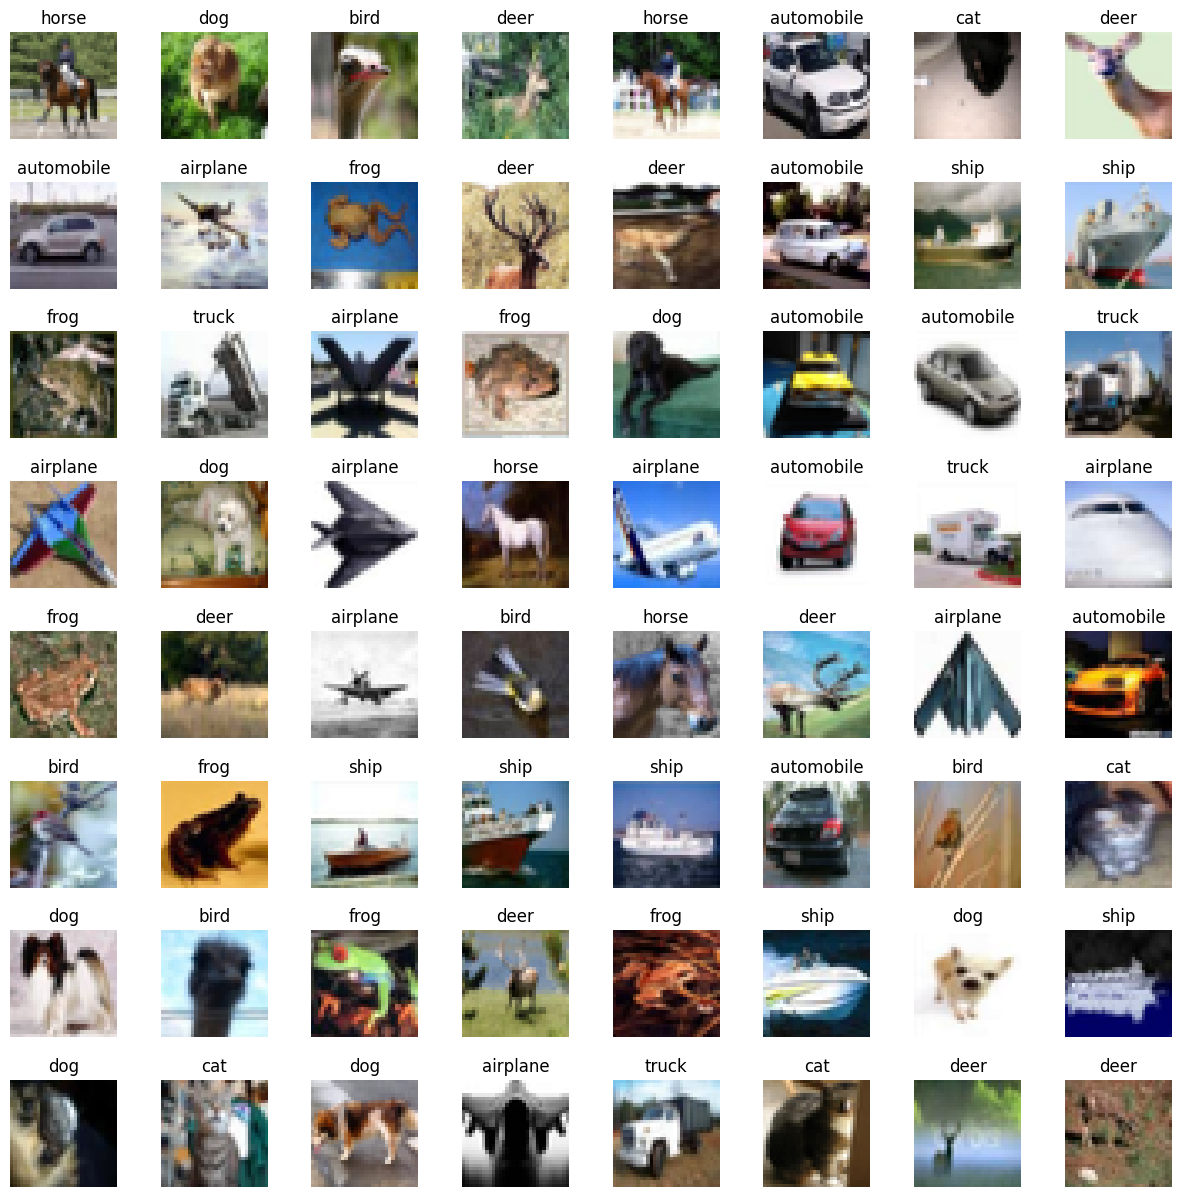

In [66]:
import matplotlib.pyplot as plt
import numpy as np
#take an overview of the dataset:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to visualize random images from the dataset
def visualize_random_data(data, labels, num_rows=8, num_cols=8):
    # Create a figure with subplots arranged in num_rows x num_cols grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    # Adjust the spacing between subplots
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # Loop over each row
    for i in range(num_rows):
        # Loop over each column
        for j in range(num_cols):
            # Generate a random index to select a random image
            index = np.random.randint(len(data))
            # Retrieve the image at the random index
            img = data[index]
            # Rescale image to [0, 1] to avoid clipping issues
            img = (img - np.min(img)) / (np.max(img) - np.min(img))
            # Display the image in the subplot at position (i, j)
            axes[i, j].imshow(img)
            # Retrieve the label for the selected image
            label = np.argmax(labels[index])
            # Set the title of the subplot to the class name of the image
            axes[i, j].set_title(class_names[label], fontsize=12)
            # Turn off axis lines and labels for the subplot
            axes[i, j].axis("off")

    # Display the figure with all subplots
    plt.show()

#Visualize random images from the training dataset
visualize_random_data(X_train, y_train)

<div style="border-radius:12px; padding: 20px; background-color: #E0FFFF; font-size:120%; text-align:left">
    
Displaying Category Distribution

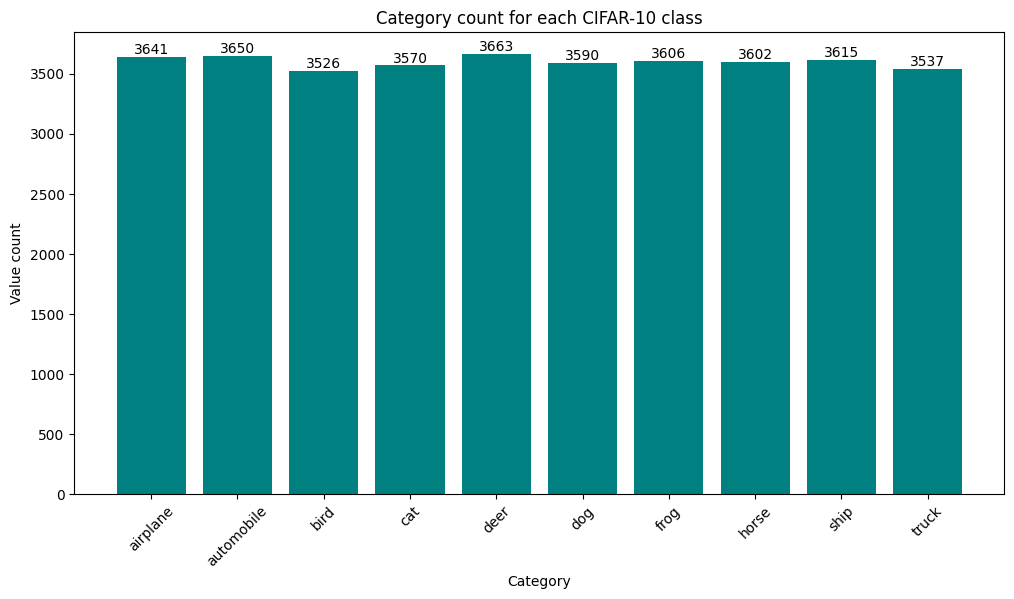

In [47]:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Calculate the number of instances for each category in the training labels
category_counts = {
    class_name: np.sum(np.argmax(y_train, axis=1) == i) for i, class_name in enumerate(class_names)
}
# Create a figure for the bar plot
plt.figure(figsize=(12, 6))
# Create a bar plot with the category counts
bars = plt.bar(range(len(category_counts)), category_counts.values(), color='teal')
# Set the title of the plot
plt.title("Category count for each CIFAR-10 class")
# Label the x-axis
plt.xlabel("Category")
# Label the y-axis
plt.ylabel("Value count")
# Set the tick marks on the x-axis to correspond to the class names
plt.xticks(range(len(category_counts)), category_counts.keys(), rotation=45)
# Add the number of counts above each bar
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2.0  # Center x position for the text
    plt.text(xval, yval, int(yval), ha='center', va='bottom')  # ha='center' aligns text horizontally to the center
# Display the bar plot
plt.show()

<div style="border-radius:12px; padding: 20px; background-color:#E0FFFF; font-size:120%; text-align:left">
Data Preprocessing; Normalization of Image Data


In [37]:
# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
# The tiny value 3e-5 is added to prevent division by zero
X_train = (X_train-mean)/(std+3e-5)
X_test  = (X_test-mean) /(std+3e-5)
X_valid = (X_valid-mean)/(std+3e-5)

<div style="border-radius:12px; padding: 20px; background-color: #E0FFFF; font-size:120%; text-align:left">
One-Hot Encoding of Labels; Convert the class labels to one-hot vectors to transform the categorical labels into a format suitable for multi-class classification by neural networks:

In [38]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

<div style="border-radius:12px; padding: 20px; background-color: #E0FFFF; font-size:120%; text-align:left">
CNN Model Architecture

In [65]:
# Initialize a sequential model
model = Sequential()

# Set the weight decay value for L2 regularization
weight_decay = 0.0001

# Add the first convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', 
                 kernel_regularizer=l2(weight_decay), input_shape=(32, 32, 3)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add the first max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with 0.25 dropout rate
model.add(Dropout(rate=0.25))

# Add the second convolutional layer with 64 filters of size 3x3
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', 
                 kernel_regularizer=l2(weight_decay)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add the second max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with 0.25 dropout rate
model.add(Dropout(rate=0.25))

# Add the third convolutional layer with 128 filters of size 3x3
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', 
                 kernel_regularizer=l2(weight_decay)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add the third max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer with 0.25 dropout rate
model.add(Dropout(rate=0.25))

# Flatten the tensor output from the previous layer
model.add(Flatten())

# Add a fully connected layer with softmax activation function for outputting class probabilities
model.add(Dense(10, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,634 (447.79 KB)

 Trainable params: 114,186 (446.04 KB)

 Non-trainable params: 448 (1.75 KB)

<div style="border-radius:12px; padding: 20px; background-color: #F5FFFA; font-size:120%; text-align:left">
Training the CNN Model

In [45]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))


Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.6111 - loss: 1.1426 - val_accuracy: 0.6423 - val_loss: 1.0310
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.6471 - loss: 1.0384 - val_accuracy: 0.6528 - val_loss: 1.0254
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.6730 - loss: 0.9590 - val_accuracy: 0.7060 - val_loss: 0.8578
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - accuracy: 0.6982 - loss: 0.8919 - val_accuracy: 0.6892 - val_loss: 0.9063
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 38s 33ms/step - accuracy: 0.7118 - loss: 0.8529 - val_accuracy: 0.7125 - val_loss: 0.8574
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 38s 34ms/step - accuracy: 0.7285 - loss: 0.8064 - val_accuracy: 0.7100 - val_loss: 0.8489
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 38s 33ms/step - accuracy: 0.7383 - loss: 0.7689 - val_accuracy: 0.7480 - val_loss: 0.7617
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.7488 -

In [48]:
# Use the model to make predictions, evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7878 - loss: 0.7222

Test Accuracy: 0.7896999716758728
Test Loss:     0.7155425548553467


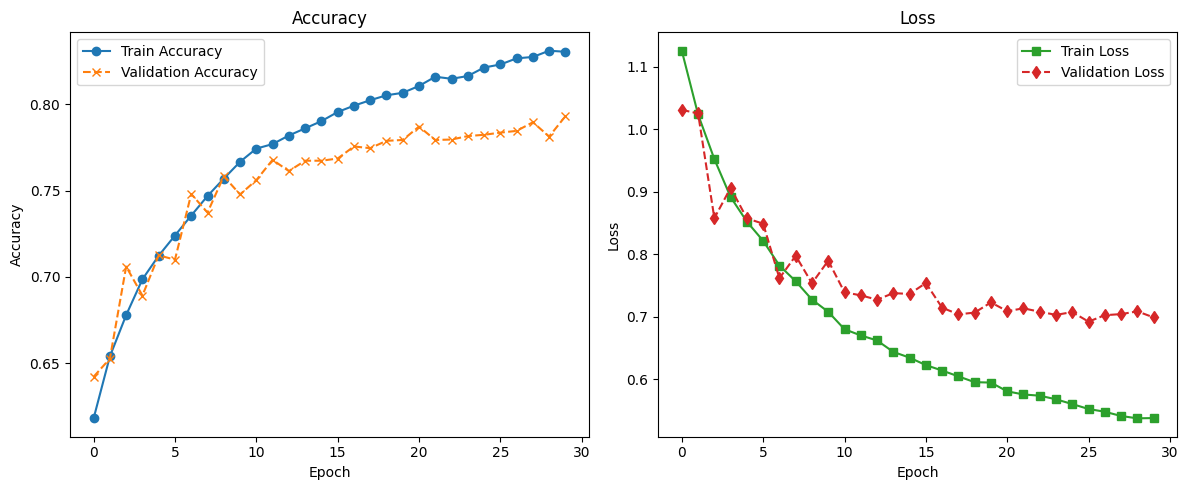

In [52]:
plt.figure(figsize=(12, 5))
# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#1f77b4', linestyle='-', marker='o')  # Blue
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff7f0e', linestyle='--', marker='x')  # Orange
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='#2ca02c', linestyle='-', marker='s')  # Green
plt.plot(history.history['val_loss'], label='Validation Loss', color='#d62728', linestyle='--', marker='d')  # Red
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

<div style="border-radius:12px; padding: 20px; background-color:#E0FFFF ; font-size:120%; text-align:left">
Evaluating the Optimal Model on Test Data; Performance on an Out-of-Dataset Image

In [53]:
# Load CIFAR-10 dataset class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [54]:
# Fetch the raw image from Pexels with user-agent header
url = "https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg"
headers = {'User-Agent': 'Mozilla/5.0'}
req = urllib.request.Request(url, headers=headers)
resp = urllib.request.urlopen(req)
image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image_data, cv2.IMREAD_UNCHANGED)

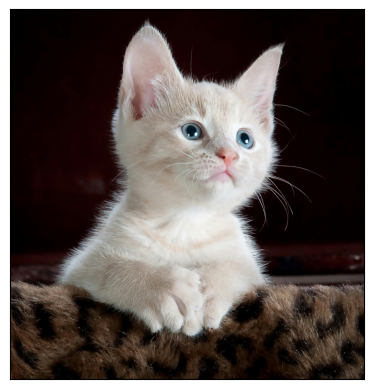

In [55]:
# Convert the image from BGR to RGB: preprocess it in the same way as we did with the training and test data:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [56]:
# Resize it to 32x32 pixels
image = cv2.resize(image, (32,32))

# Normalize the image
image = (image-mean)/(std+3e-5)

# Add an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

In [57]:
prediction = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


In [58]:
#The prediction will be a 10-element probability vector. To get the predicted class, we find the index with the maximum value:
predicted_class = prediction.argmax()

print('Predicted class: ', class_names[predicted_class])

Predicted class:  cat


In [59]:
#Test 2 
# Fetch the raw image from Pexels with user-agent header
url = "https://cloudfront.slrlounge.com/wp-content/uploads/2015/02/untitled-2.jpg"
headers = {'User-Agent': 'Mozilla/5.0'}
req = urllib.request.Request(url, headers=headers)
resp = urllib.request.urlopen(req)
image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image_data, cv2.IMREAD_UNCHANGED)

In [60]:
# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

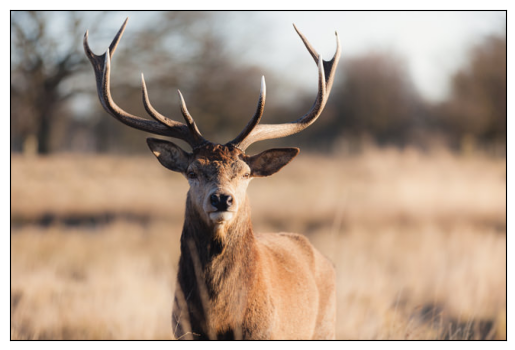

In [61]:
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [62]:
# Resize it to 32x32 pixels
image = cv2.resize(image, (32,32))

# Normalize the image
image = (image-mean)/(std+3e-5)

# Add an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

In [63]:
prediction = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [64]:
predicted_class = prediction.argmax()

print('Predicted class: ', class_names[predicted_class])

Predicted class:  deer


<h2 align="left"><font color='#20B2AA'>Thank You!</font></h2>